In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist
from scipy.stats import spearmanr

import scvelo as scv
import scanpy as sc
import anndata as an
import scvi
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

# Load expression

In [2]:
%%time

fpath = "/nfs/turbo/umms-indikar/shared/projects/HSC/pipeline_outputs/integrated_anndata/cell_cycle/pseudotime.h5ad"
adata = sc.read_h5ad(fpath)
adata

CPU times: user 292 ms, sys: 3.63 s, total: 3.93 s
Wall time: 5.47 s


AnnData object with n_obs × n_vars = 6895 × 15906
    obs: 'batch', 'phase', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'n_reads', 'raw_clusters', 'bbknn_clusters', 'harmony_clusters', 'cluster_str', 'barcoded_phase', 'S_score', 'G2M_score', 'dpt_pseudotime', 'dpt_groups', 'dpt_order', 'dpt_order_indices', 'G1_pseudotime', 'G1_order', 'G2M_pseudotime', 'G2M_order', 'mean_pseudotime', 'mean_order', 'nnz', 'velocyto_cell_id', 'cell_id', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'leiden', 'cluster_phase', 'early_g1_score', 'G1_stage', 'global_ordering', 'global_ordering_bin', 'velocity_self_tra

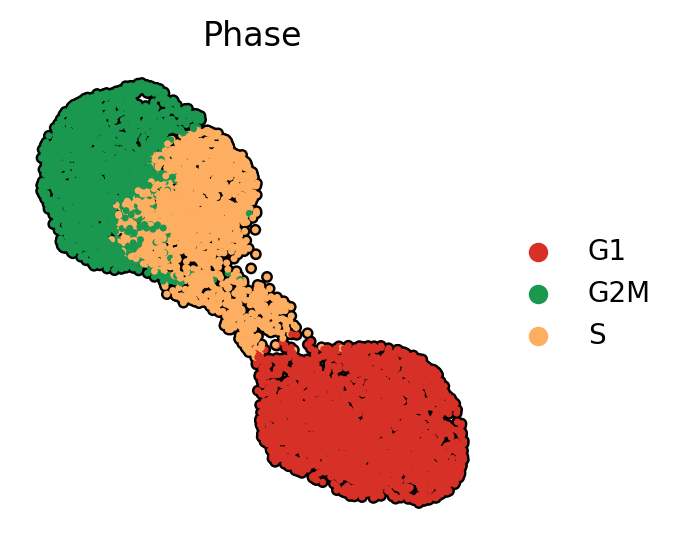

In [3]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3

palette = {
    "G1": "#D73027",        
    "S": "#FDAE61",       
    "G2M": "#1A9850",    
    "unknown": "#B0B0B0", 
}
    
sc.pl.umap(
    adata,
    color='cluster_phase',
    size=25,
    ncols=3,
    alpha=1,
    use_raw=False,
    add_outline=True,
    outline_color=('k', 'k'),
    palette=palette,
    title='Phase',
    frameon=False,
    wspace=0.25,
)

# Early G1 

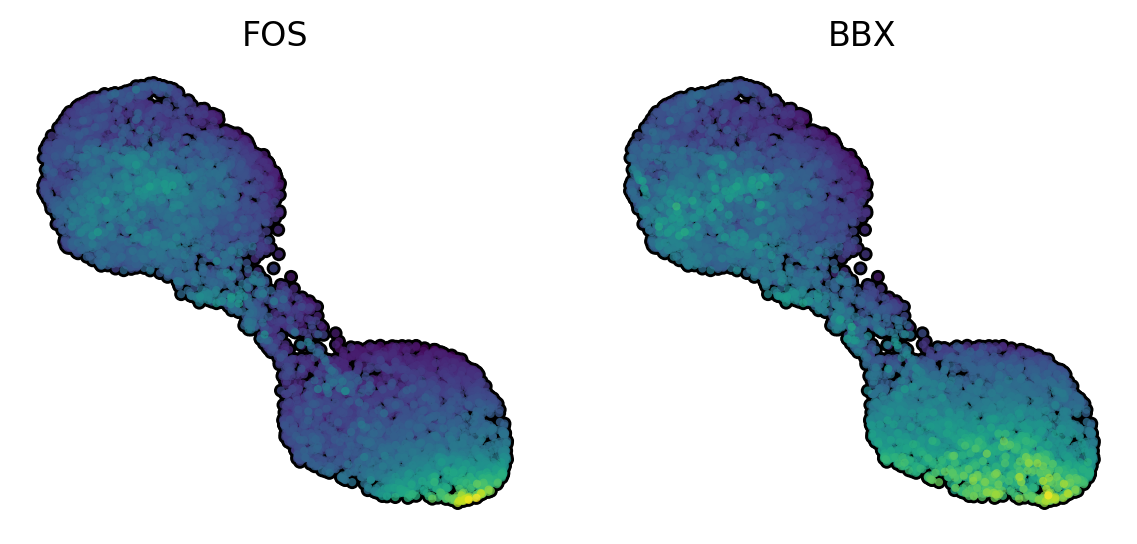

In [4]:
layer = 'scvi'
genes = [
    "FOS", "BBX",
]

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3

axes = sc.pl.umap(
    adata,
    color=genes,
    size=35,
    ncols=3,
    alpha=0.75,
    use_raw=False,
    layer=layer,
    add_outline=True,
    outline_color=('k', 'k'),
    frameon=False,
    wspace=0.15,
    return_fig=True, 
    colorbar_loc=None,
)

# axes.figure.suptitle(f"Early G1 ({layer.upper()})", fontsize=14, y=0.95)
plt.show()

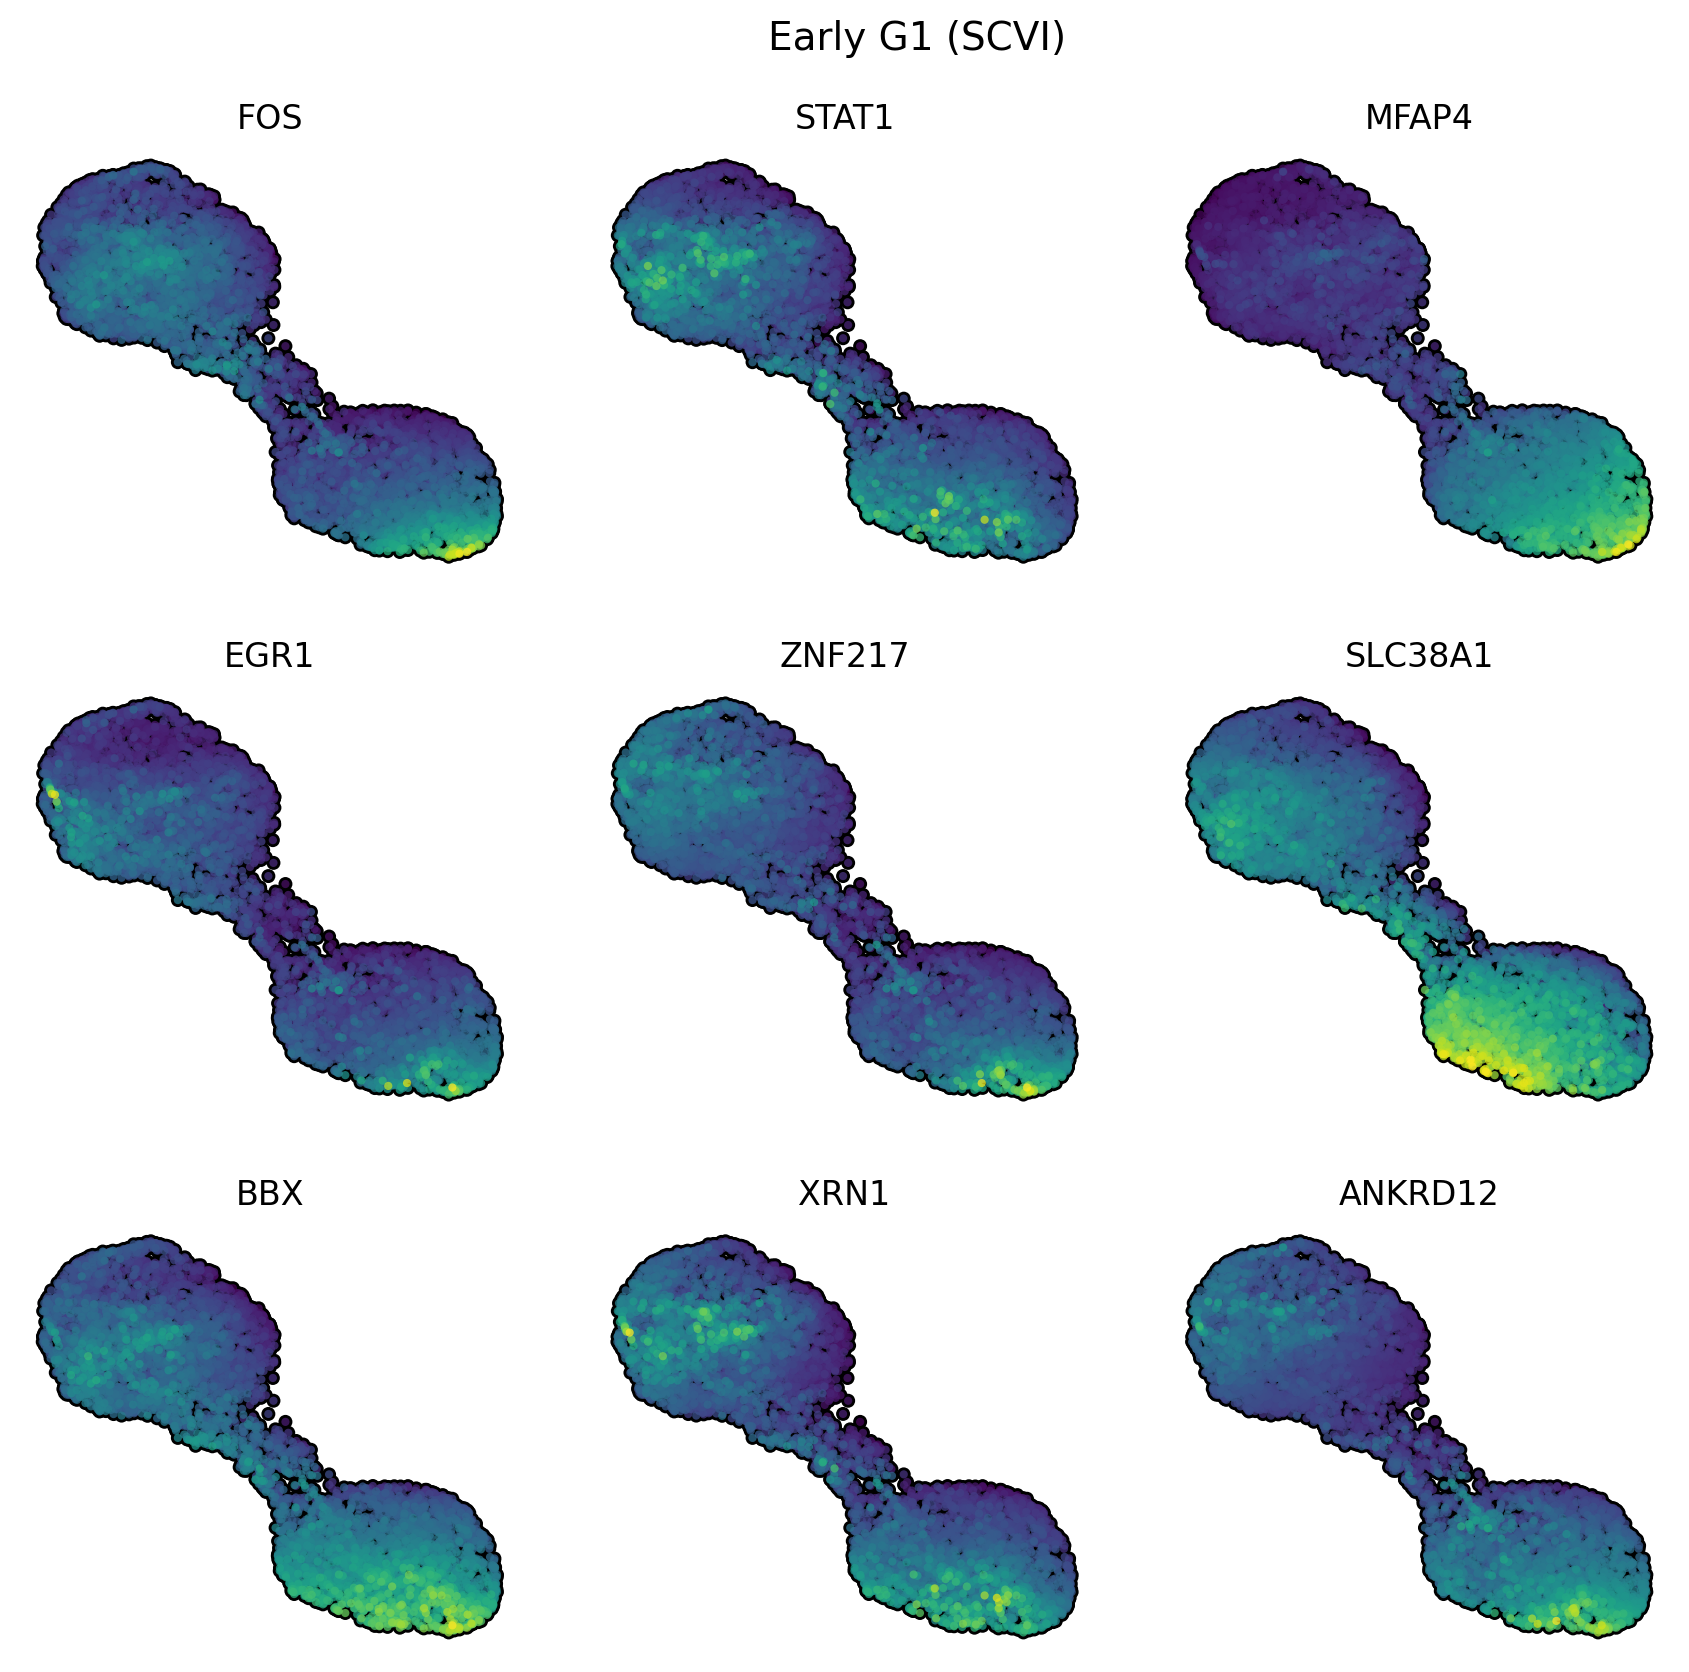

In [5]:
layer = 'scvi'
genes = [
    "FOS", "STAT1", "MFAP4",
    "EGR1", "ZNF217", "SLC38A1",
    "BBX","XRN1", "ANKRD12",
]

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3

axes = sc.pl.umap(
    adata,
    color=genes,
    size=35,
    ncols=3,
    alpha=0.75,
    use_raw=False,
    layer=layer,
    add_outline=True,
    outline_color=('k', 'k'),
    frameon=False,
    wspace=0.15,
    return_fig=True, 
    colorbar_loc=None,
)

axes.figure.suptitle(f"Early G1 ({layer.upper()})", fontsize=14, y=0.95)
plt.show()

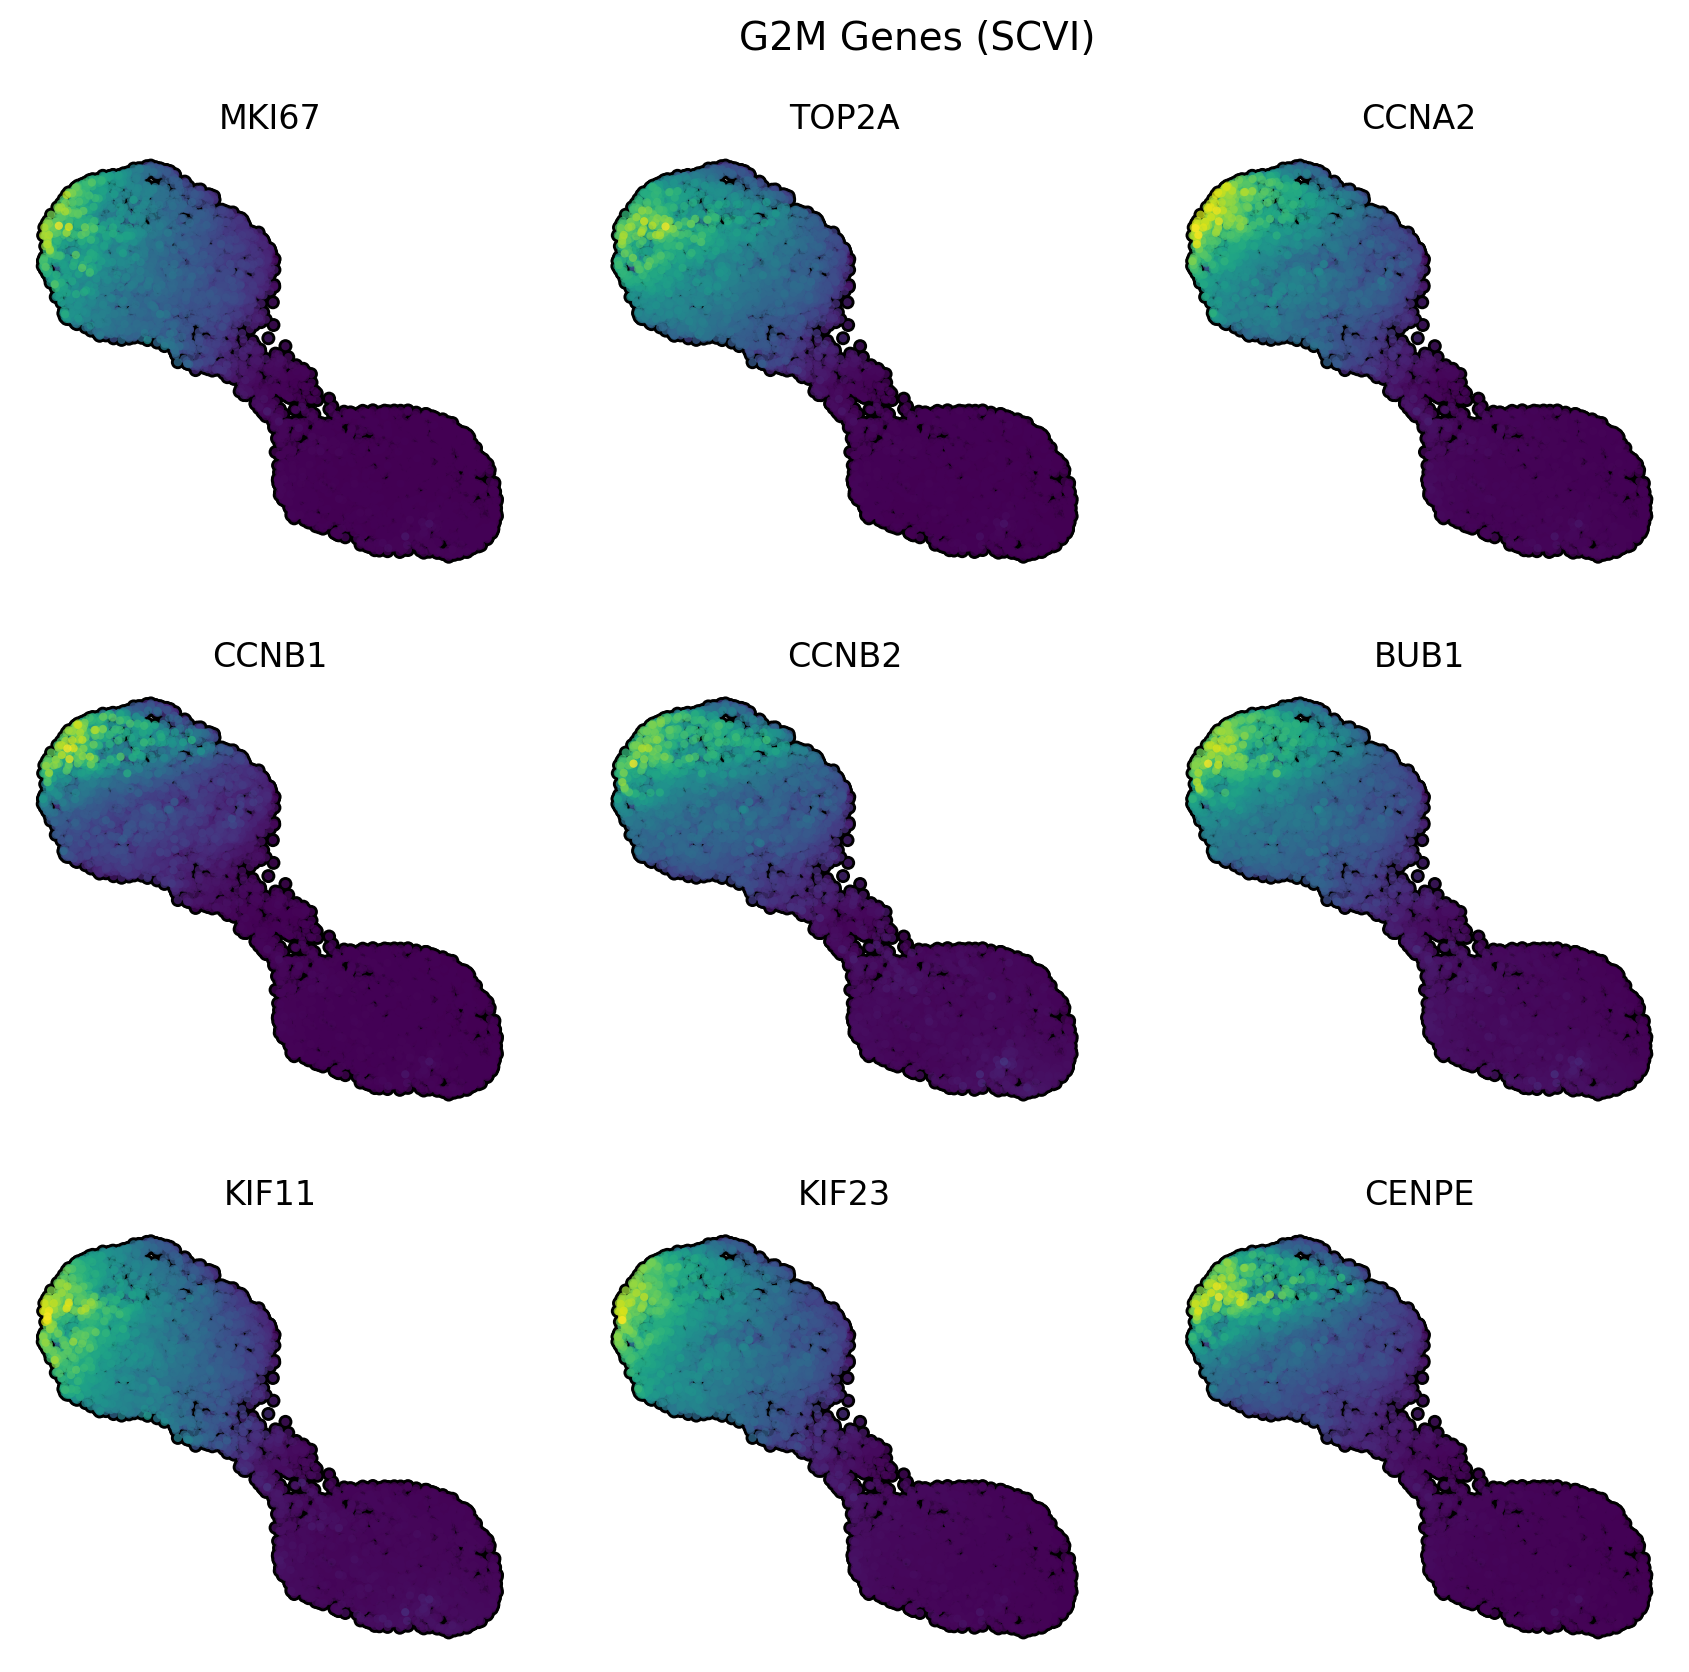

In [8]:
layer = 'scvi'
genes = [
   "MKI67", "TOP2A", "CCNA2", 
   "CCNB1", "CCNB2","BUB1", 
    "KIF11", "KIF23", "CENPE",
]

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3

axes = sc.pl.umap(
    adata,
    color=genes,
    size=35,
    ncols=3,
    alpha=0.75,
    use_raw=False,
    layer=layer,
    add_outline=True,
    outline_color=('k', 'k'),
    frameon=False,
    wspace=0.15,
    return_fig=True, 
    colorbar_loc=None,
)

axes.figure.suptitle(f"G2M Genes ({layer.upper()})", fontsize=14, y=0.95)
plt.show()

In [13]:
cell_cycle_genes = [x.strip() for x in open('../resources/regev_lab_cell_cycle_genes.txt')]

s_genes = [x for x in cell_cycle_genes[:43] if x in adata.var_names]
g2m_genes = [x for x in cell_cycle_genes[43:] if x in adata.var_names]

print(f"Total cell cycle genes in file: {len(cell_cycle_genes)}")
print(f"S-phase genes available in adata: {len(s_genes)} / 43")
print(f"G2M-phase genes available in adata: {len(g2m_genes)} / {len(cell_cycle_genes) - 43}")
print("\nFirst few S-phase genes found:", s_genes[:10])
print("First few G2M-phase genes found:", g2m_genes[:10])

Total cell cycle genes in file: 97
S-phase genes available in adata: 42 / 43
G2M-phase genes available in adata: 52 / 54

First few S-phase genes found: ['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6']
First few G2M-phase genes found: ['HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2']


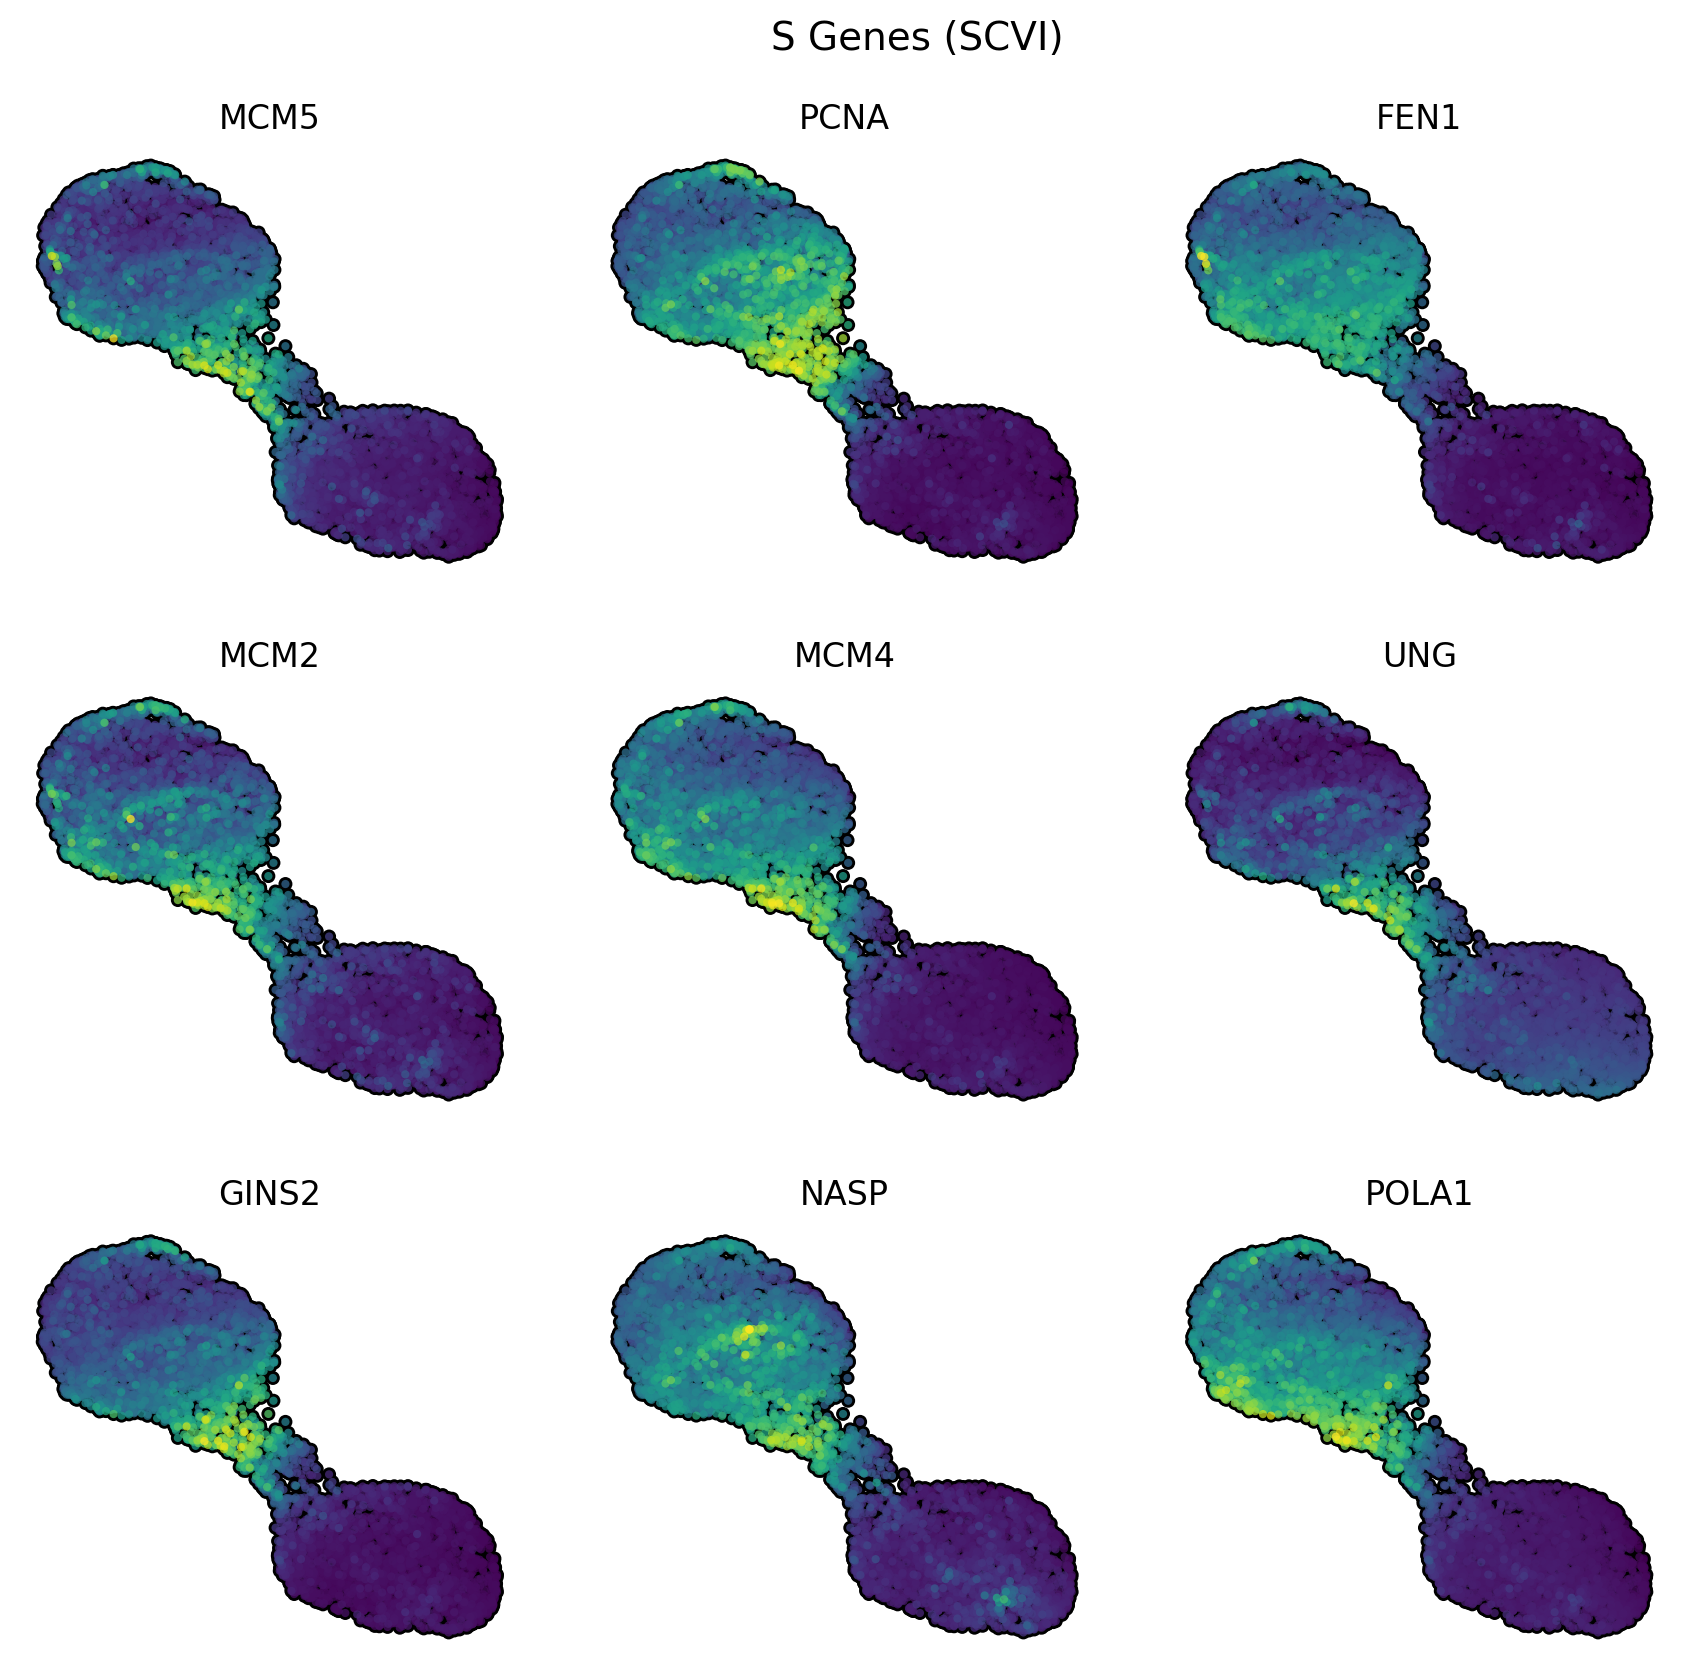

In [18]:
layer = 'scvi'
genes = [
    'MCM5', 'PCNA', 'FEN1', 
    'MCM2', 'MCM4', 'UNG', 
    'GINS2', 'NASP', 'POLA1',
]


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3

axes = sc.pl.umap(
    adata,
    color=genes,
    size=35,
    ncols=3,
    alpha=0.75,
    use_raw=False,
    layer=layer,
    add_outline=True,
    outline_color=('k', 'k'),
    frameon=False,
    wspace=0.15,
    return_fig=True, 
    colorbar_loc=None,
)

axes.figure.suptitle(f"S Genes ({layer.upper()})", fontsize=14, y=0.95)
plt.show()